In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

> **1 (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.**

In [1]:
data_file_1 = "../data/diagnosis.csv"
attr_file_1 = "../data/diagnosis_names.txt"

In [2]:
import re
attr1 = []
with open(attr_file_1, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if (re.findall('^[a/d]+[1-6]', line)):
            attr1.append(line.split(" ")[0])

print("Total:", len(attr1), "attributes.")
print(attr1)

Total: 8 attributes.
['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']


In [5]:
df = pd.read_csv(data_file_1, header=None, names=attr1, sep="\t", encoding = 'utf-16')
df.head()

,a1,a2,a3,a4,a5,a6,d1,d2
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [6]:
df = df.replace(regex={r'(,)': r'.', 'yes':1, 'no': 0 })  #replacing ',' in temperature column with '.', yes and no with 1 and 0 respectively

In [7]:
df['a1'] = df['a1'].astype(float)
df.dtypes

a1    float64
a2      int64
a3      int64
a4      int64
a5      int64
a6      int64
d1      int64
d2      int64
dtype: object

> **1 (b) Build a decision tree on the whole data set and plot it**

In [8]:
feature_cols = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']
labels = ['d1', 'd2']

X = df[feature_cols]
y = df[labels]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # 70% training and 30% test

In [11]:
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt_clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


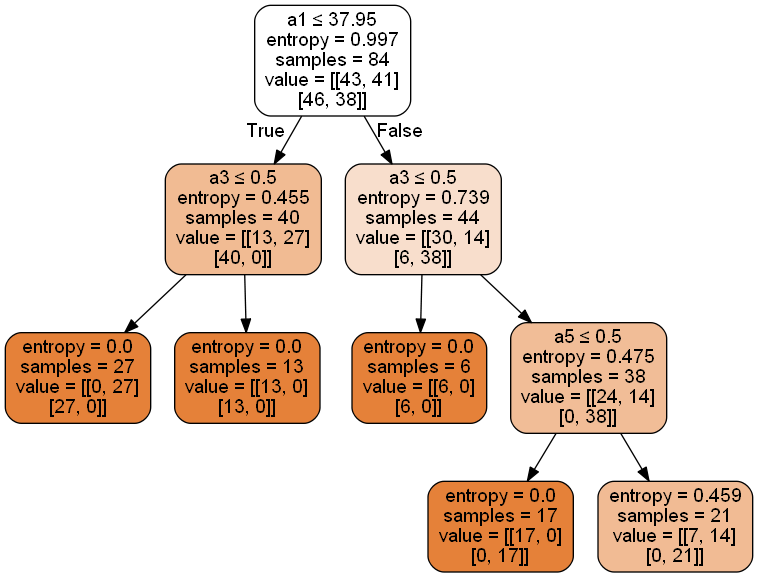

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True,feature_names = feature_cols, class_names = ['d1', 'd2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hw5_dt.png')
Image(graph.create_png())

[Text(0.4444444444444444, 0.875, 'a1 <= 37.95\nentropy = 0.997\nsamples = 84\nvalue = [[43, 41]\n[46, 38]]'),
 Text(0.2222222222222222, 0.625, 'a3 <= 0.5\nentropy = 0.455\nsamples = 40\nvalue = [[13, 27]\n[40, 0]]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(0.6666666666666666, 0.625, 'a3 <= 0.5\nentropy = 0.739\nsamples = 44\nvalue = [[30, 14]\n[6, 38]]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7777777777777778, 0.375, 'a5 <= 0.5\nentropy = 0.475\nsamples = 38\nvalue = [[24, 14]\n[0, 38]]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.459\nsamples = 21\nvalue = [[7, 14]\n[0, 21]]')]

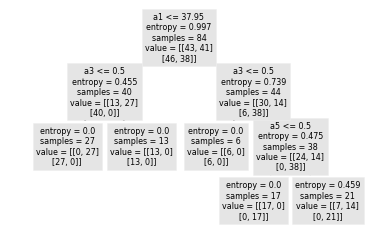

In [13]:
from sklearn import tree

tree.plot_tree(dt_clf,feature_names = feature_cols, class_names = ['d1', 'd2'])

> **1 (c) Convert the decision rules into a set of IF-THEN rules**

In [14]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [15]:
tree_to_rules(dt_clf, feature_cols)

 if ( a1 <= 37.95000076293945 ) {
   if ( a3 <= 0.5 ) {
     return [[ 0. 27.]
 [27.  0.]]
   } else {
     return [[13.  0.]
 [13.  0.]]
   }
 } else {
   if ( a3 <= 0.5 ) {
     return [[6. 0.]
 [6. 0.]]
   } else {
     if ( a5 <= 0.5 ) {
       return [[17.  0.]
 [ 0. 17.]]
     } else {
       return [[ 7. 14.]
 [ 0. 21.]]
     }
   }
 }


> **(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.**

In [16]:
from sklearn.model_selection import GridSearchCV
#initial guess of parameters
param_grid = {
 'max_depth':[5,10,20,],
 'min_samples_split':[20,40,60,80],
 'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
gridSearch.fit(X_train, y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8683823529411765
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}


In [17]:
#improved set
#takes time to run
param_grid = {
 'max_depth': list(range(3,12)), 
 'min_samples_split': list(range(15, 35)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 5)], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  1.0
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0001, 'min_samples_split': 15}


[Text(0.4, 0.9, 'a1 <= 37.95\ngini = 0.498\nsamples = 84\nvalue = [[43, 41]\n[46, 38]]'),
 Text(0.2, 0.7, 'a3 <= 0.5\ngini = 0.219\nsamples = 40\nvalue = [[13, 27]\n[40, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(0.6, 0.7, 'a3 <= 0.5\ngini = 0.335\nsamples = 44\nvalue = [[30, 14]\n[6, 38]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7, 0.5, 'a5 <= 0.5\ngini = 0.233\nsamples = 38\nvalue = [[24, 14]\n[0, 38]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8, 0.3, 'a4 <= 0.5\ngini = 0.222\nsamples = 21\nvalue = [[7, 14]\n[0, 21]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[0, 7]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[0, 14]\n[0, 14]]')]

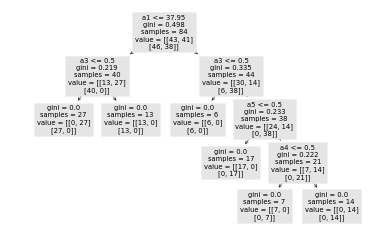

In [18]:
# fit the final model with best parameters:
prunedtree = DecisionTreeClassifier(random_state = 1, max_depth=4, min_impurity_decrease=0.0001, min_samples_split=15)
prunedtree.fit(X_train, y_train)
tree.plot_tree(prunedtree,feature_names = feature_cols, class_names = ['d1', 'd2'])

In [19]:
#cost complexity pruning
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [20]:
from sklearn.model_selection import cross_val_score

mean, std = [], []
for i in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)
    # 5 fold cross validation for each alpha value
    scores = cross_val_score(tree, X, y, cv=5)
    mean.append(scores.mean())
    std.append(scores.std())
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
df2 = pd.DataFrame({'alpha': ccp_alphas, 'mean': mean, 'std': std})
df2 = df2.sort_values(['mean'], ascending = False)
df2.head()

,alpha,mean,std
0,0.000000,0.950000,0.100000
1,0.099970,0.566667,0.140929
2,0.172084,0.541667,0.131762
3,0.216604,0.091667,0.130171
4,0.393074,0.025000,0.050000


At α = 0, the model overfits, so we take the next best α

[Text(0.4, 0.9, 'a1 <= 37.95\ngini = 0.498\nsamples = 84\nvalue = [[43, 41]\n[46, 38]]'),
 Text(0.2, 0.7, 'a3 <= 0.5\ngini = 0.219\nsamples = 40\nvalue = [[13, 27]\n[40, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(0.6, 0.7, 'a3 <= 0.5\ngini = 0.335\nsamples = 44\nvalue = [[30, 14]\n[6, 38]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7, 0.5, 'a5 <= 0.5\ngini = 0.233\nsamples = 38\nvalue = [[24, 14]\n[0, 38]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8, 0.3, 'a4 <= 0.5\ngini = 0.222\nsamples = 21\nvalue = [[7, 14]\n[0, 21]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[0, 7]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[0, 14]\n[0, 14]]')]

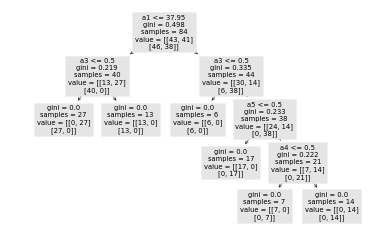

In [22]:
from sklearn import tree

prunedtree_cv = DecisionTreeClassifier(ccp_alpha=df2.iloc[1, 0], random_state=0)
prunedtree_cv.fit(X_train, y_train)

y_pred = prunedtree_cv.predict(X_test)
tree.plot_tree(prunedtree,feature_names = feature_cols, class_names = ['d1', 'd2'])

>**2 (a) Download the Communities and Crime data3 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.**

In [4]:
data_file = "../data/communities.csv"
attr_file = "../data/communities_names.txt"

In [5]:
attr = []
with open(attr_file, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if (line.startswith('@attribute')):
            attr.append(line.split(" ")[1])
# 128 attibutes expected: 122 predictive, 5 non-predictive and 1 target
print("Total:", len(attr), "attributes.")
print("Attributes to be ignored:", attr[:5])

Total: 128 attributes.
Attributes to be ignored: ['state', 'county', 'community', 'communityname', 'fold']


In [21]:
data = pd.read_csv(data_file, sep=",", header=None, names=attr, na_values='?')
train_data = data[0:1495]
test_data = data[1495:]
train_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7.0,41500.0,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


> **2 (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.**

In [22]:
from sklearn.impute import SimpleImputer

data = data.iloc[:, 5:] #omit the first 5 columns as they are non-predictive
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp_mean.fit_transform(data)
data = pd.DataFrame(data)

train_data = data[:1495]
test_data = data[1495:]

x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

x_test

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.305987,0.01,0.23,0.73,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.305987,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.305987,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.305987,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.305987,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1500,0.01,0.48,0.02,0.77,0.84,0.05,0.37,0.26,0.20,0.50,...,0.305987,0.01,0.23,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1501,0.05,0.64,0.03,0.84,0.21,0.33,0.45,0.50,0.30,0.24,...,0.305987,0.02,0.39,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1502,0.27,0.37,0.22,0.67,0.42,0.07,0.39,0.50,0.33,0.42,...,0.320000,0.14,0.31,0.22,0.250000,0.090000,0.840000,1.000000,0.45,0.210000
1503,0.00,0.24,0.01,0.95,0.01,0.01,0.22,0.23,0.13,1.00,...,0.305987,0.06,0.04,0.03,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
1504,0.02,0.32,0.20,0.81,0.08,0.05,0.28,0.43,0.26,0.59,...,0.305987,0.02,0.26,0.09,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


> **2 (c) Plot a correlation matrix for the features in the data set**

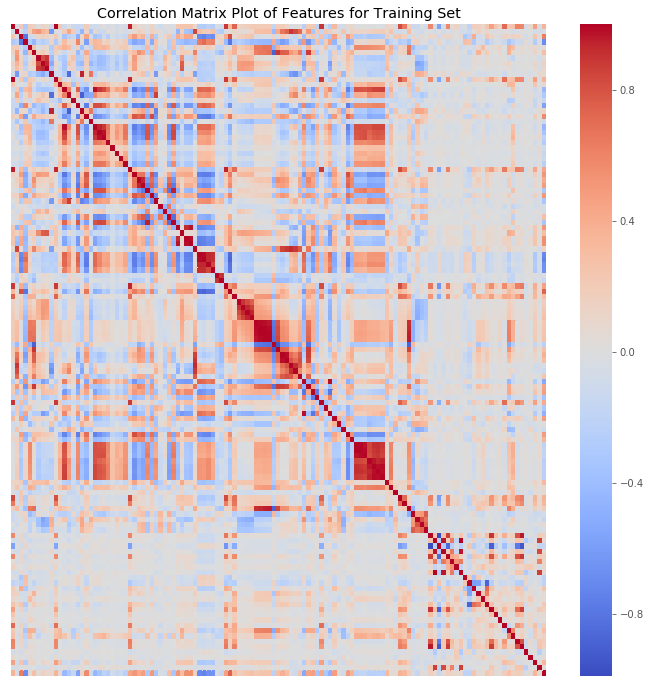

In [23]:
# plot correlation maxtrix on entire dataset
fit, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), cmap='coolwarm',xticklabels=False, yticklabels=False, ax=axes)
plt.title("Correlation Matrix Plot of Features for Training Set")
plt.show()

> **2 (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean**

In [24]:
cv = lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis = 1, arr = np.array(x_train).T)
varation = pd.DataFrame(var, columns=["varation"])
varation

,varation
0,2.240355
1,0.355681
2,1.428407
3,0.330102
4,1.358645
5,1.611552
6,0.368960
7,0.291217
8,0.500143
9,0.412638


> **2 (e) Pick √128 features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?**

feature number is 11


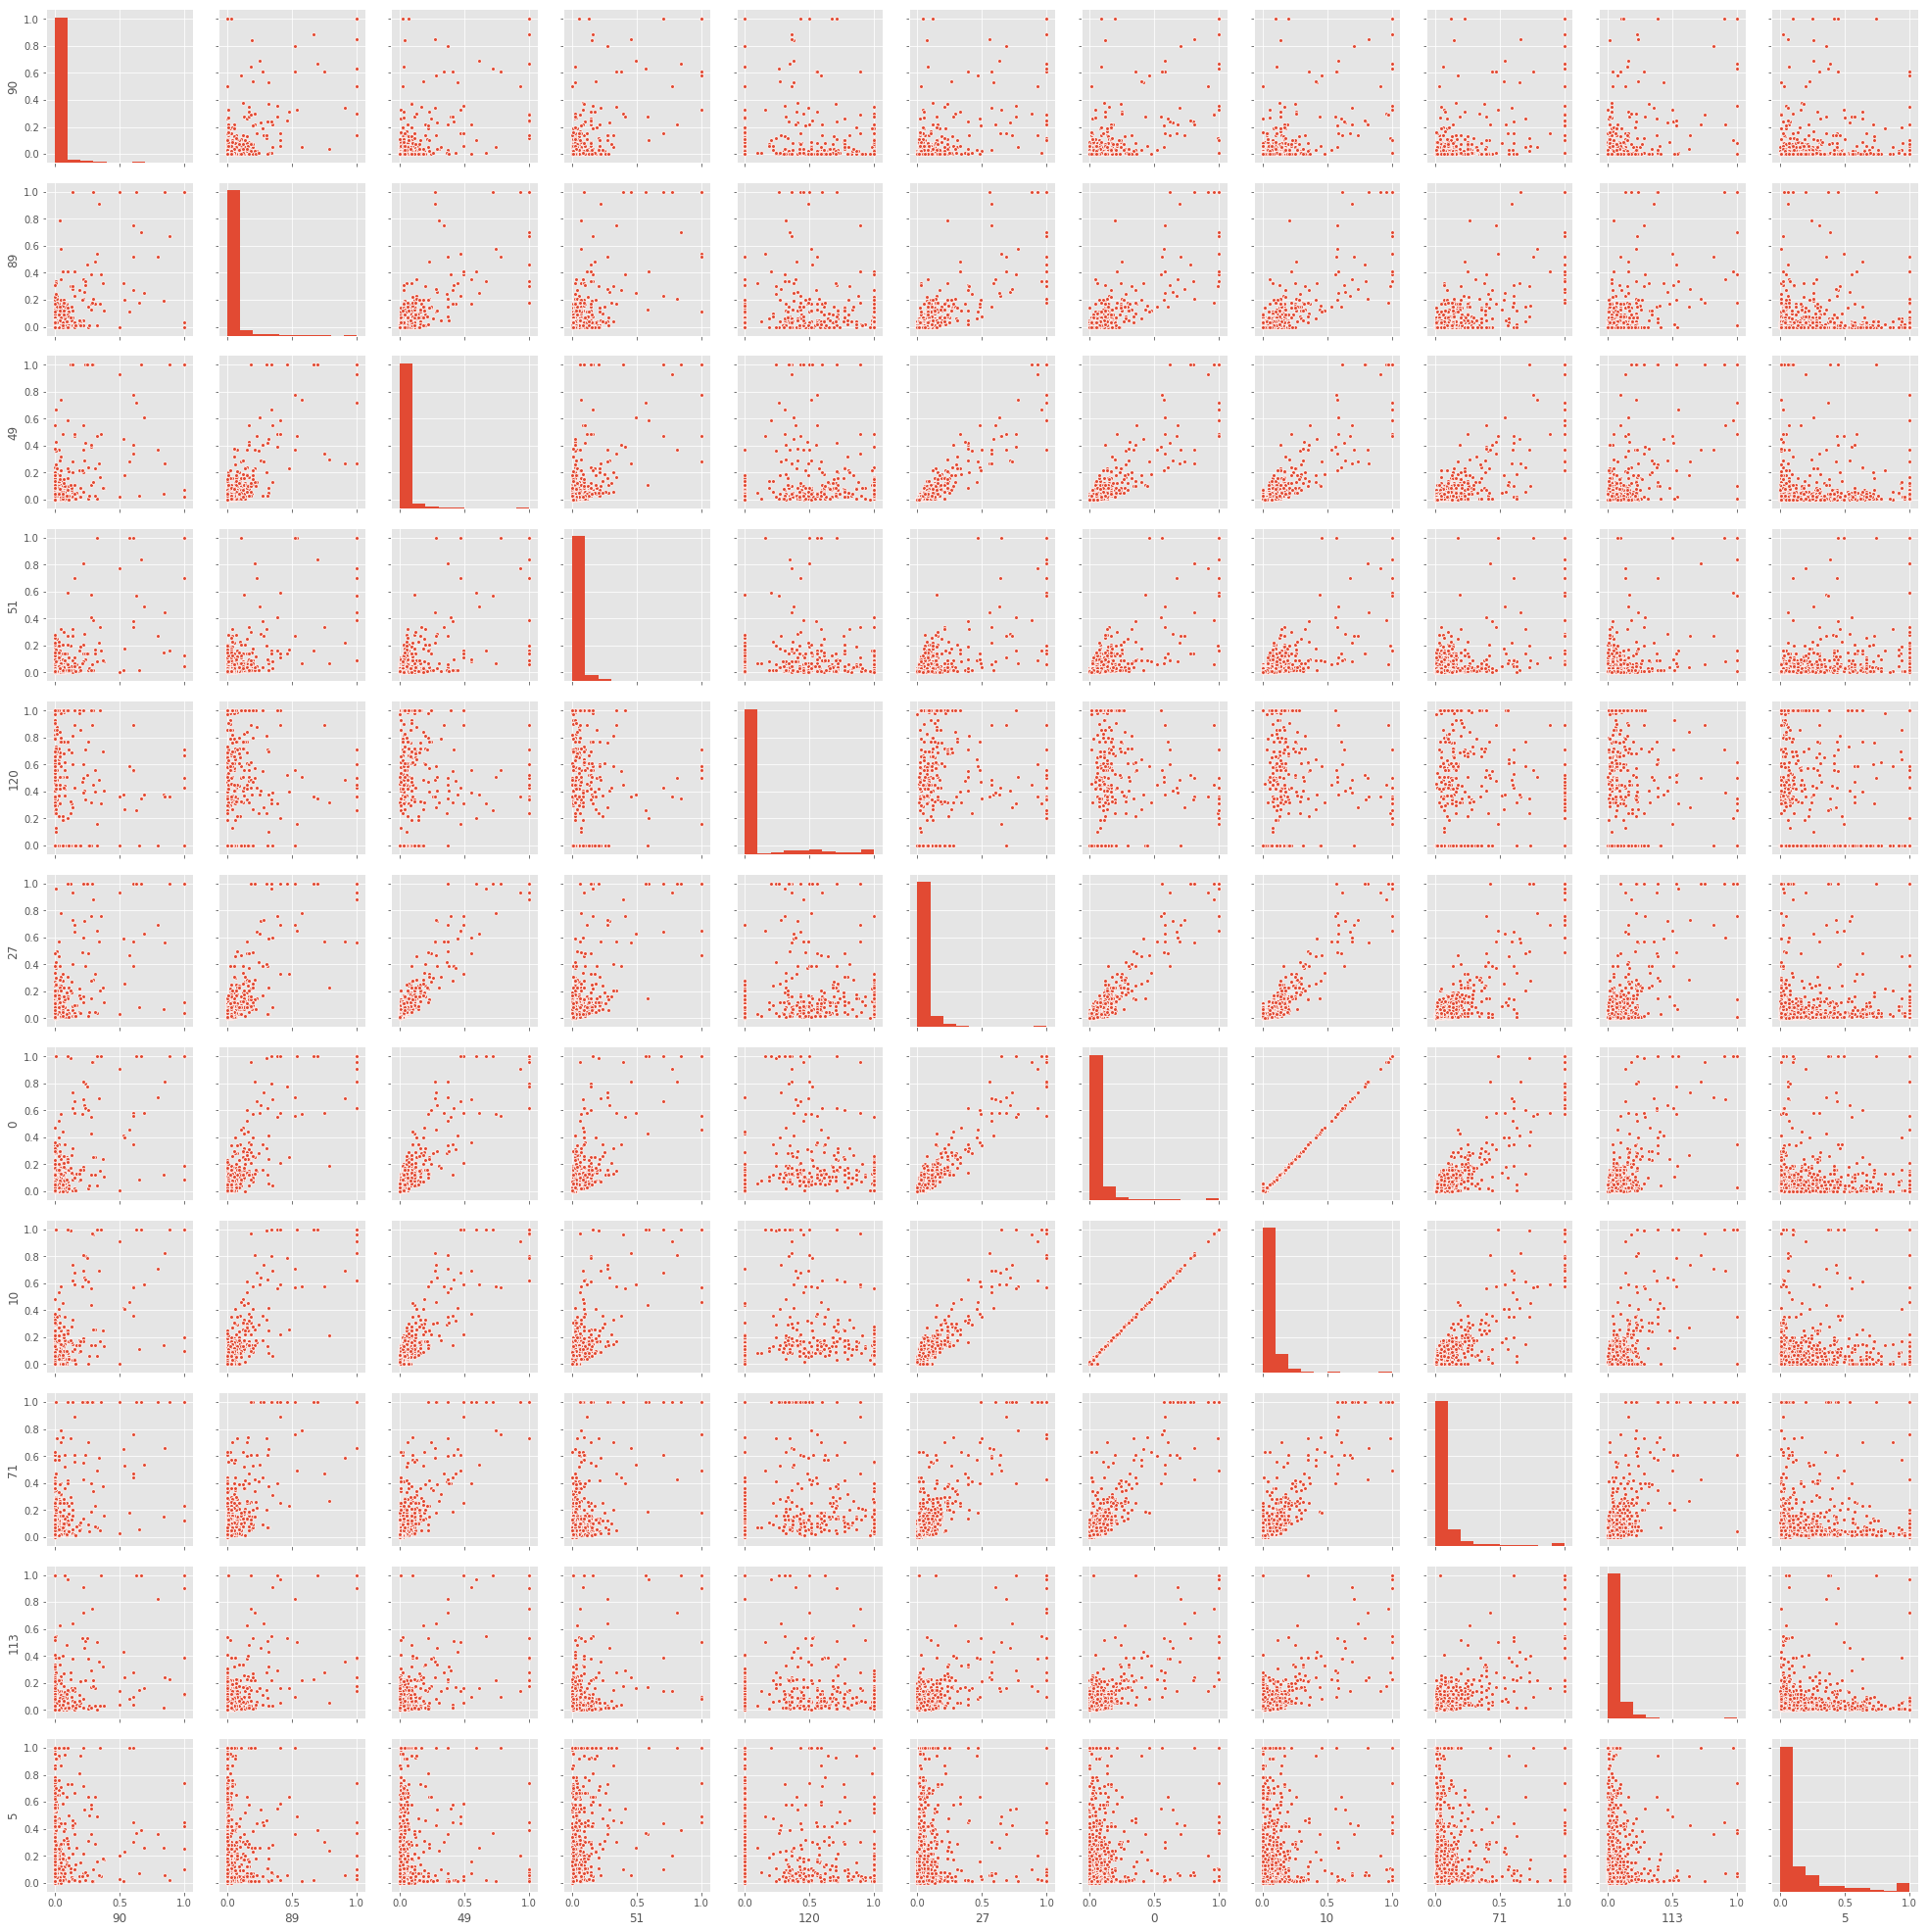

In [25]:
import math

threshold = math.floor(pow(128,0.5))
print('feature number is', threshold)
sorted_var = varation.sort_values('varation', ascending=False)
# get first 11 features
features = sorted_var[:threshold].T
train_features = train_data.iloc[:, features.columns]
train_features

sns.pairplot(train_features, plot_kws={'s':15})

> **2 (f) Fit a linear model using least squares to the training set and report the test error.**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

ols_reg = LinearRegression().fit(x_train, y_train)
r_square = ols_reg.score(x_test,y_test)
y_predict = ols_reg.predict(x_test)
mse = MSE(y_test, y_predict)
#print('R-Square:', r_square)
print('MSE:', mse)

MSE: 0.7897255274315341


> **2 (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.**

In [14]:
from sklearn.linear_model import RidgeCV

alphas=[1e-3, 1e-2, 1e-1, 1]
ridge_model = RidgeCV(alphas=alphas, cv=5, normalize= False).fit(x_train, y_train)
r_square = ridge_model.score(x_test,y_test)
y_predict =ridge_model.predict(x_test)
mse = MSE(y_test,y_predict)
print('Best λ: ', ridge_model.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

Best λ:  1.0
R-Square: 0.627021995706937
MSE: 0.01773708110430369


> **2 (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.**

In [15]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

alphas=[1e-3, 1e-2, 1e-1, 1]
lasso_model = LassoCV(alphas=alphas, cv=5, random_state=0).fit(x_train, y_train)
r_square = lasso_model.score(x_test,y_test)
y_predict =lasso_model.predict(x_test)
mse = MSE(y_test,y_predict)
print('Before standardized features:')
print('Best λ: ', lasso_model.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

Before standardized features:
Best λ:  0.001
R-Square: 0.6310550538601053
MSE: 0.01754528781156862


In [16]:
# select features
selected_features = lasso_model.coef_ != 0
selected_train_features = x_train.iloc[:, selected_features]
print('Train Features index:', list(selected_train_features.columns))

Train Features index: [2, 3, 7, 11, 17, 24, 38, 44, 45, 48, 50, 59, 68, 71, 72, 74, 86, 88, 90, 91, 94, 119, 120]


In [17]:
# standardized features
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standard_x_train = scaler.fit_transform(x_train)
standard_x_test = scaler.fit_transform(x_test)
# using lasso model
lasso_model = LassoCV(alphas=alphas, cv=5, random_state=0).fit(standard_x_train, y_train)
r_square = lasso_model.score(standard_x_test,y_test)
y_predict =lasso_model.predict(standard_x_test)
mse = MSE(y_test,y_predict)
print('After standardized features:')
print('Best λ: ', lasso_model.alpha_)
print('R-Square:', r_square)
print('MSE:', mse)

After standardized features:
Best λ:  0.001
R-Square: 0.622438475885954
MSE: 0.01795505176711006


> **2 (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.**

In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

best_m = 1
best_mse = 1
M = range(1, 123)
mse = []
for m in M:
    pca = PCA(n_components=m)
    x_reduced = pca.fit_transform(x_train)
    linear_reg = LinearRegression()
    scores = cross_validate(linear_reg, x_reduced, y_train, cv=3,scoring=('r2', 'neg_mean_squared_error'))  #CV to get MSE
    r_square = np.mean(scores['test_r2'])
    mse = -1*(np.mean(scores['test_neg_mean_squared_error']))
    if mse < best_mse:
        best_mse = mse
        best_m = m
print('Best M:', best_m)
print('Best MSE:', best_mse)

Best M: 65
Best MSE: 0.01969978879260073


> **2 (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.**

In [19]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

train_matrix = xgb.DMatrix(data=x_train, label=y_train)
a_list = [1e-3, 1e-2, 1e-1, 1]
a_list = np.power(10, a_list)
for a in a_list:
    param = {'max_depth':2, 'eta':0.3, 'alpha':a}
    scores = xgb.cv(param, train_matrix, num_boost_round=100, nfold=5,metrics='rmse')
    mse = np.mean(scores['test-rmse-mean'])
    print('α:', a)
    print('MSE:', mse)

α: 1.0023052380778996
MSE: 0.1460887781416411
α: 1.023292992280754
MSE: 0.14604379376174006
α: 1.2589254117941673
MSE: 0.1464041744913726
α: 10.0
MSE: 0.15342322767728378


In [ ]:
#https://www.datacamp.com/tutorial/decision-tree-classification-python
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
#https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
#http://scikit.ml/api/skmultilearn.problem_transform.lp.html
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
#https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4
#https://debuggercafe.com/a-guide-to-xgboost-in-python/
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
#https://machinelearningmastery.com/lasso-regression-with-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
#https://github.com/dmlc/xgboost/issues/7444